<a href="https://colab.research.google.com/github/zyy999ilar/sta365/blob/main/Bayes_00_Intro2Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Most Basic Bayesian Interview Question

---

Are you familiar with Bayesian inference?

> Yes!

Well then you must know **the law of total probability**! What's that?

> What proportion of students will pass this class $\Pr(pass)$ if you know $\Pr(pass|quick)$ as well as the distribution of $quick$?

Now what proportion of students who will pass the class answer this question quickly?

> The structure of this question is **_the most basic Bayesian interview question_**, but it requires some assumptions...

# Bayesian Terminology
---

## Bayes Theorem

\begin{align*}
\overset{posterior}{p(\theta|x)} &={} \frac{\overset{likelihood}{p(x|\theta)}\times \overset{prior}{p(\theta)}}{\overset{\text{evidence}}{p(x)}}\\
&={} \frac{{p(x, \theta)}}{\underset{\text{marginal likelihood}}{\displaystyle \int p(x|\theta)p(\theta) d\theta}} \textrm{ or }
\frac{{p(x, \theta)}}{\underset{\text{law of total probability}}{\displaystyle \sum_{k} p(x|\theta_k)p(\theta_k)}} =
\frac{\overset{joint}{p(x, \theta)}}{\underset{\text{normalizing constant}}{c}}
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

# Example
---
\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} C^n_k\theta^{x}(1-\theta)^{n-x}\\
&&& \quad\; [\text{exponential family distribution if $n$ is known}]\\
&&& \quad\; [\text{What is this distribution? What is $C^n_k$?}]\\\\
\text{Prior} && p(\theta|\alpha,\beta) &={} \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1} \\
&&& \quad\; [\text{$\alpha$ and $\beta$ are called }\textbf{hyperparameters}]\\
&&& \quad\; [\text{What is this distribution? What is $\Gamma(\cdot)$?}]\\\\
\text{Posterior} && p(\theta|x,n,\alpha,\beta) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \frac{C^n_k\theta^{x}(1-\theta)^{n-x}  \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1} }{p(x)} \\
&&& = \;\texttt{What distribution parameterized how?}
\end{align*}


# Homework

---

Q1: What proportion of students who answer this question quickly will pass the class?
Assume the probability of passing the class is 0.9.
Assume the probability of answering this question quickly is 0.6 if you'll pass the class,
while the probability drops to 0.3 if you'll not pass the class.
\begin{align*}
\text{Answer:}\\\\
P(\text{Pass} | \text{Quick}) &= \frac{P(\text{Quick} | \text{Pass}) \cdot P(\text{Pass})}{P(\text{Quick})} \\\\
P(\text{Quick}) &= P(\text{Quick} | \text{Pass}) \cdot P(\text{Pass}) + P(\text{Quick} | \text{Fail}) \cdot P(\text{Fail}) \\
&= 0.6 \times 0.9 + 0.3 \times 0.1 \\
&= 0.54 + 0.03 = 0.57 \\\\
P(\text{Pass} | \text{Quick}) &= \frac{0.6 \times 0.9}{0.57} = \frac{0.54}{0.57} \approx 0.9474
\end{align*}

Q2:
\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Multinomial}\\\\
\text{Prior} && p(\theta|\boldsymbol{\alpha}) &={} \texttt{Dirichlet} \\
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}
### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$


**_and the posterior is always a proper distribution if the prior is_**


\begin{align*}
\textbf{Answer: The posterior distribution is a Dirichlet distribution with parameters}\\
\boldsymbol{\alpha}{_\text{posterior}} = \boldsymbol{\alpha}{_\text{prior}} + x.
\end{align*}

Q3: Create a sample from a three category multinomial distribution and visualize the multinomial distribution and the multinomial sample; then, visualize the simplex Dirichlet distribution of the prior and the posterior using a ternary plot.



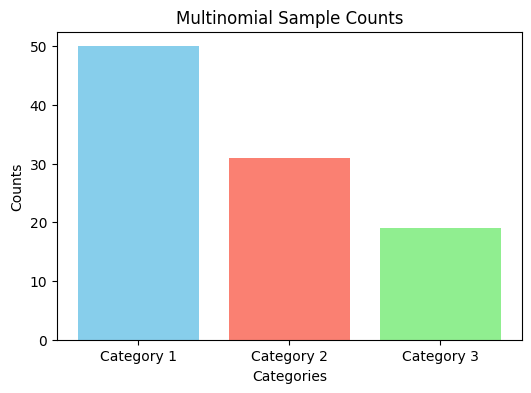

In [42]:
import numpy as np
from scipy import stats
import plotly.figure_factory as ff
import numpy as np

# p1p2p3_scatter = stats.dirichlet(alpha=np.array([1.0, 1.0, 1.0])).rvs(size=100)
p1 = np.linspace(0,1,100)
p2 = 1-p1.copy()
p_ = np.linspace(0,1,100)
p1 = (p1[np.newaxis,:]*p_[:,np.newaxis]).flatten()
p2 = (p2[np.newaxis,:]*p_[:,np.newaxis]).flatten()
p3 = 1-p1-p2
p = np.c_[p1,p2,p3]

alpha_prior = np.array([1.2, 1.2, 1.2])  # Prior alpha values
dirichlet_prior = stats.dirichlet(alpha=alpha_prior)
dirichlet_prior_densities = dirichlet_prior.pdf(p.T)

plt.figure(figsize=(6, 4))
plt.bar(['Category 1', 'Category 2', 'Category 3'], sample, color=['skyblue', 'salmon', 'lightgreen'])
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Multinomial Sample Counts')
plt.show()

# https://plotly.com/python/ternary-contour/Links to an external site.
fig = ff.create_ternary_contour(p.T, dirichlet_prior.pdf(p.T),
                                pole_labels=['p1', 'p2', 'p3'],
                                interp_mode='cartesian',
                                showscale=True)
fig.update_layout(title_text='Dirichlet Prior')
fig.show()

# Calculate the Dirichlet posterior densities
dirichlet_posterior = stats.dirichlet(alpha=alpha_posterior)
dirichlet_posterior_densities = dirichlet_posterior.pdf(p.T)

# Create the ternary contour plot for the posterior
fig_post = ff.create_ternary_contour(p.T, dirichlet_posterior.pdf(p.T),
                                     pole_labels=['p1', 'p2', 'p3'],
                                     interp_mode='cartesian',
                                     showscale=True)
fig_post.update_layout(title_text='Dirichlet Posterior')
fig_post.show()